*This* notebook contains code used to create figures in the powerpoint presentation, 8810-ML4BA-meeting-6-tree-regression.pptx

Create simulated regression data

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

# random seed
rs = 654321

# Parameters for the simulated data
n_samples = 1000    # Number of samples
n_features = 5      # Number of features
noise = 10.0        # Standard deviation of gaussian noise

# Generating simulated regression data
X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=noise, random_state=rs)

# Creating a DataFrame for better visualization
data = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(n_features)])
data['Target'] = y

# Showing the first few rows of the dataset
data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,-0.548626,0.040516,-1.879911,0.885191,0.221624,-19.317590
1,-0.089854,-0.178384,-0.514548,0.148642,1.393258,108.567186
2,0.265243,1.198195,-0.770167,0.108696,-1.355541,-31.880359
3,-0.420384,-0.103989,-0.047758,-0.198473,-1.378853,-174.517940
4,1.017440,-0.828577,-0.731526,-0.449229,-1.349124,-226.797749


Create a simple decision tree to predict the target variable

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Target', axis=1), data['Target'], test_size=0.2, random_state=42)

# Creating a decision tree regressor
decision_tree = DecisionTreeRegressor(random_state=42, max_depth=3)

# Fitting the model to the training data
decision_tree.fit(X_train, y_train)

# Scoring the model on the test data
score = decision_tree.score(X_test, y_test)

score


0.45130911389627604

Create a graphic of the tree

[Text(0.5, 0.875, 'x[4] <= -0.211\nsamples = 800\nvalue = 9.613'),
 Text(0.25, 0.625, 'x[1] <= 0.104\nsamples = 307\nvalue = -96.928'),
 Text(0.125, 0.375, 'x[3] <= 0.206\nsamples = 178\nvalue = -167.863'),
 Text(0.0625, 0.125, 'samples = 104\nvalue = -227.638'),
 Text(0.1875, 0.125, 'samples = 74\nvalue = -83.854'),
 Text(0.375, 0.375, 'x[3] <= -0.508\nsamples = 129\nvalue = 0.951'),
 Text(0.3125, 0.125, 'samples = 35\nvalue = -139.941'),
 Text(0.4375, 0.125, 'samples = 94\nvalue = 53.411'),
 Text(0.75, 0.625, 'x[1] <= 0.663\nsamples = 493\nvalue = 75.957'),
 Text(0.625, 0.375, 'x[3] <= -0.275\nsamples = 349\nvalue = 25.599'),
 Text(0.5625, 0.125, 'samples = 133\nvalue = -50.301'),
 Text(0.6875, 0.125, 'samples = 216\nvalue = 72.334'),
 Text(0.875, 0.375, 'x[3] <= -0.549\nsamples = 144\nvalue = 198.005'),
 Text(0.8125, 0.125, 'samples = 40\nvalue = 77.166'),
 Text(0.9375, 0.125, 'samples = 104\nvalue = 244.482')]

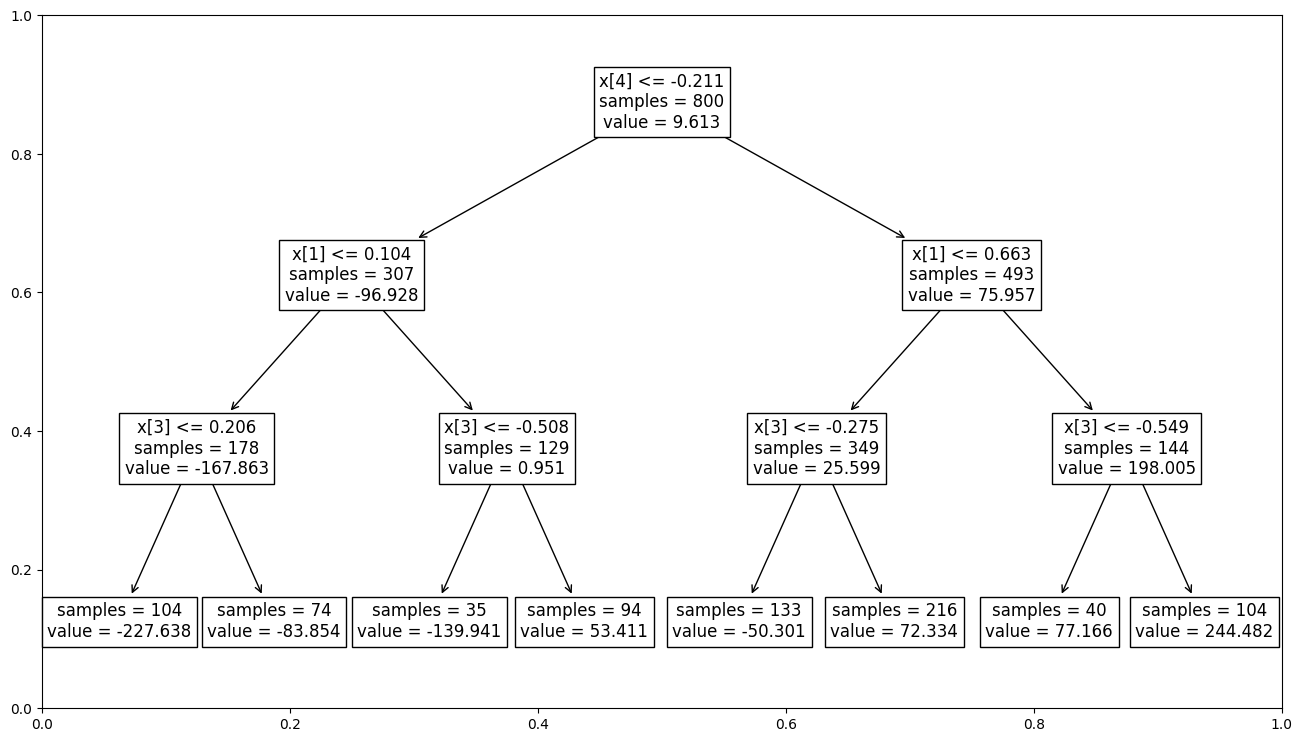

In [3]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
fig = plt.subplots(figsize=(16,9))
ax = plt.axes()
plot_tree(decision_tree, max_depth=3, fontsize=12, impurity =False, ax=ax)